# Level A

# A1. Loading Dataset and Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataset/winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


| Attribute            | Type       | Explanation                                                             |
|----------------------|------------|-------------------------------------------------------------------------|
| fixed acidity        | Continuous | Represents concentration of acids, can take any float value in a range. |
| volatile acidity     | Continuous | Represents acetic acid content, measured continuously.                  |
| citric acid          | Continuous | Concentration of citric acid, numeric, continuous.                      |
| residual sugar       | Continuous | Amount of sugar remaining after fermentation, numeric, continuous.      |
| chlorides            | Continuous | Salt content, measured as float, continuous.                            |
| free sulfur dioxide  | Continuous | Free SO₂ content, numeric, continuous.                                  |
| total sulfur dioxide | Continuous | Total SO₂ content, numeric, continuous.                                 |
| density              | Continuous | Wine density, numeric, continuous.                                      |
| pH                   | Continuous | Acidity level, numeric, continuous.                                     |
| sulphates            | Continuous | Sulfates content, numeric, continuous.                                  |
| alcohol              | Continuous | Alcohol % by volume, numeric, continuous.                               |
| quality              | Ordinal    | Wine quality score (0–10), ordered integers representing quality.       |


# A2. Descriptive Statistics

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
num_cols = df.select_dtypes(include="number").columns
num_cols = num_cols.drop("quality")
num_cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

Removed quality column, because it inappropriate to select iit for stat

In [5]:
mean_values = df[num_cols].mean()
median_values = df[num_cols].median()
mode_values = df[num_cols].mode().iloc[0]

range_values = df[num_cols].max() - df[num_cols].min()
variance_values = df[num_cols].var()
std_values = df[num_cols].std()
iqr_values = df[num_cols].quantile(0.75) - df[num_cols].quantile(0.25)

stats_df = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Range': range_values,
    'Variance': variance_values,
    'Std Dev': std_values,
    'IQR': iqr_values
})

stats_df

,Mean,Median,Mode,Range,Variance,Std Dev,IQR
fixed acidity,8.319637,7.90000,7.2000,11.30000,3.031416,1.741096,2.100000
volatile acidity,0.527821,0.52000,0.6000,1.46000,0.032062,0.179060,0.250000
citric acid,0.270976,0.26000,0.0000,1.00000,0.037947,0.194801,0.330000
residual sugar,2.538806,2.20000,2.0000,14.60000,1.987897,1.409928,0.700000
chlorides,0.087467,0.07900,0.0800,0.59900,0.002215,0.047065,0.020000
free sulfur dioxide,15.874922,14.00000,6.0000,71.00000,109.414884,10.460157,14.000000
total sulfur dioxide,46.467792,38.00000,28.0000,283.00000,1082.102373,32.895324,40.000000
density,0.996747,0.99675,0.9972,0.01362,0.000004,0.001887,0.002235
pH,3.311113,3.31000,3.3000,1.27000,0.023835,0.154386,0.190000
sulphates,0.658149,0.62000,0.6000,1.67000,0.028733,0.169507,0.180000


## boxplot

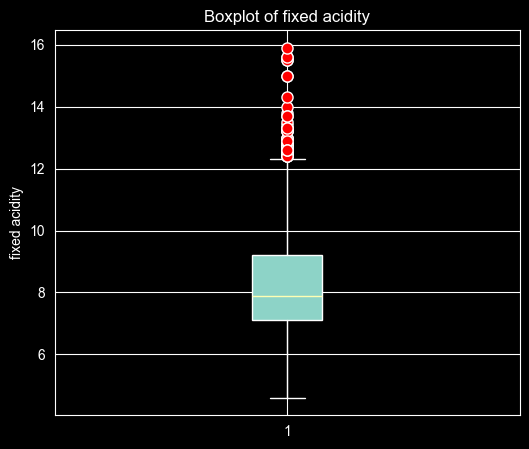

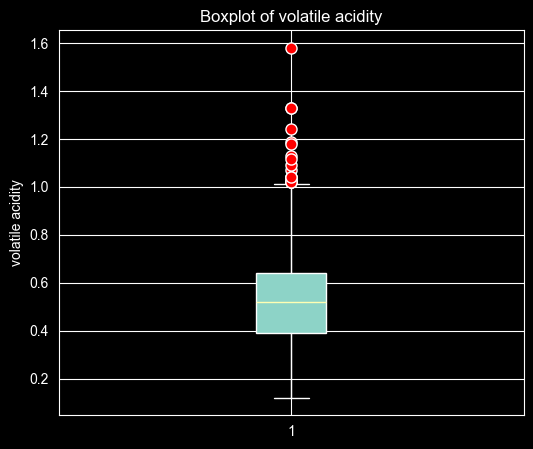

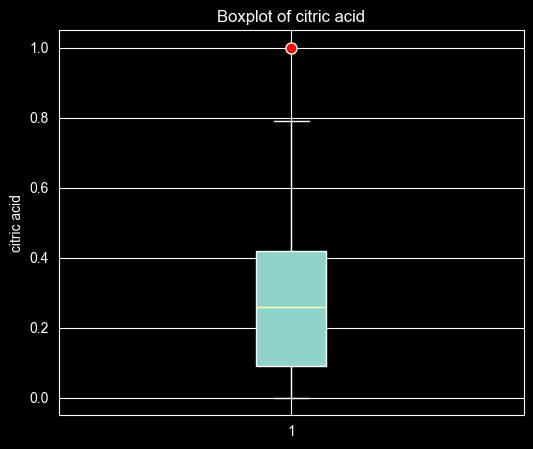

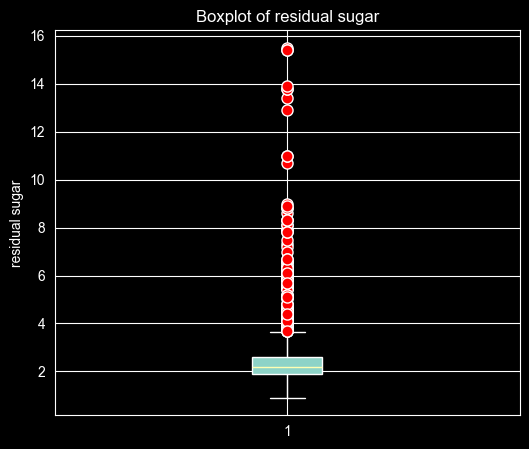

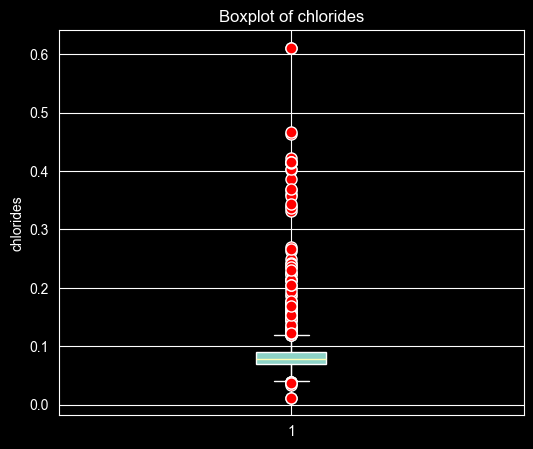

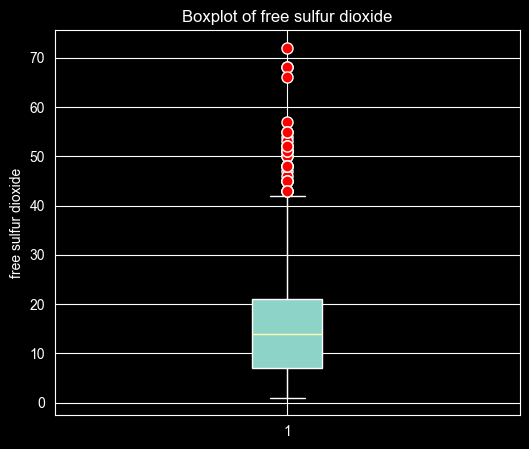

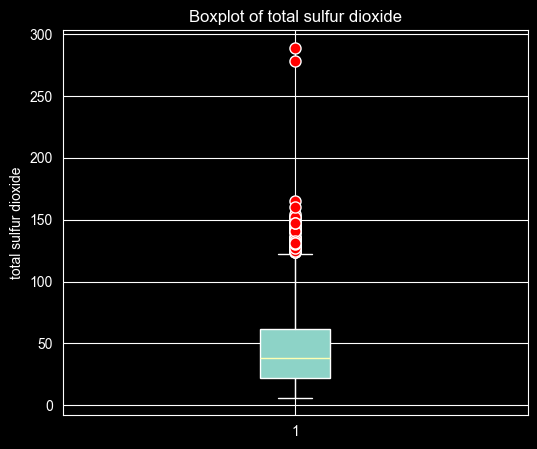

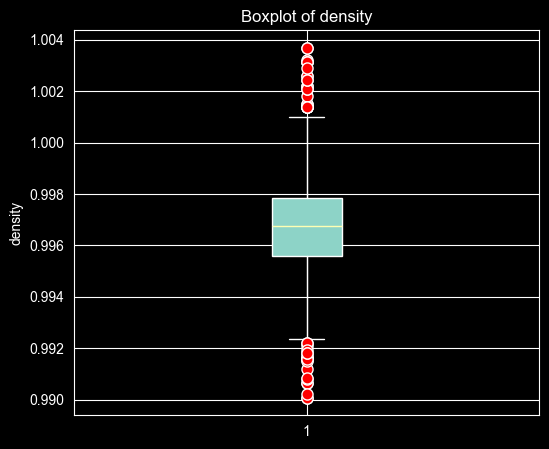

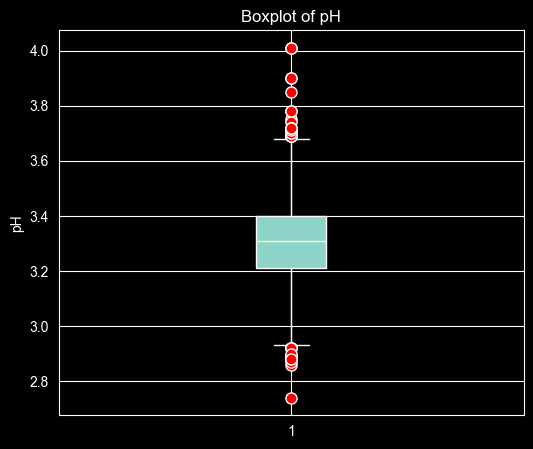

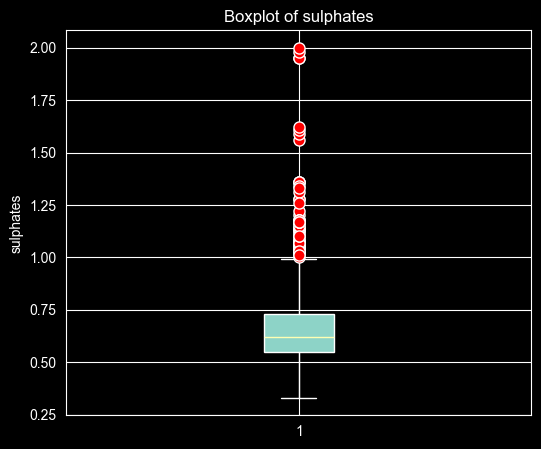

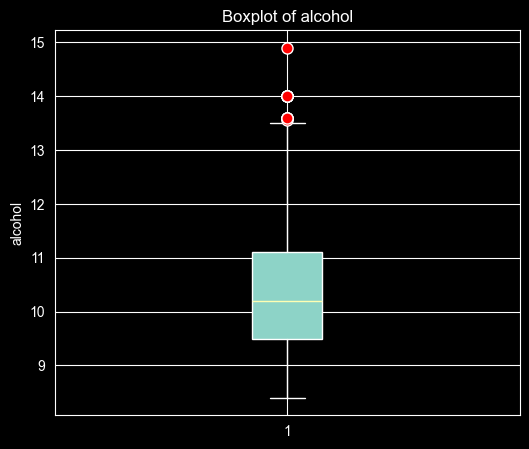

In [6]:
for col in num_cols:
    plt.figure(figsize=(6, 5))
    plt.boxplot(df[col], patch_artist=True,
                flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()


In [7]:
outliers = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outlier_values = df[(df[col] < lower) | (df[col] > upper)][col].values
    outliers[col] = outlier_values

for col, vals in outliers.items():
    print(f"{col}: {len(vals)} outliers: \n{vals}")


fixed acidity: 49 outliers: 
[12.8 12.8 15.  15.  12.5 13.3 13.4 12.4 12.5 13.8 13.5 12.6 12.5 12.8
 12.8 14.  13.7 13.7 12.7 12.5 12.8 12.6 15.6 12.5 13.  12.5 13.3 12.4
 12.5 12.9 14.3 12.4 15.5 15.5 15.6 13.  12.7 13.  12.7 12.4 12.7 13.2
 13.2 13.2 15.9 13.3 12.9 12.6 12.6]
volatile acidity: 19 outliers: 
[1.13  1.02  1.07  1.33  1.33  1.04  1.09  1.04  1.24  1.185 1.02  1.035
 1.025 1.115 1.02  1.02  1.58  1.18  1.04 ]
citric acid: 1 outliers: 
[1.]
residual sugar: 155 outliers: 
[ 6.1   6.1   3.8   3.9   4.4  10.7   5.5   5.9   5.9   3.8   5.1   4.65
  4.65  5.5   5.5   5.5   5.5   7.3   7.2   3.8   5.6   4.    4.    4.
  4.    7.    4.    4.    6.4   5.6   5.6  11.   11.    4.5   4.8   5.8
  5.8   3.8   4.4   6.2   4.2   7.9   7.9   3.7   4.5   6.7   6.6   3.7
  5.2  15.5   4.1   8.3   6.55  6.55  4.6   6.1   4.3   5.8   5.15  6.3
  4.2   4.2   4.6   4.2   4.6   4.3   4.3   7.9   4.6   5.1   5.6   5.6
  6.    8.6   7.5   4.4   4.25  6.    3.9   4.2   4.    4.    4.    6.6
  6.  

# A3. Handling Missing Data

In [8]:
df_missing = df.copy()

np.random.seed(42)

for col in num_cols:
    n_missing = int(0.05 * len(df_missing))
    missing_indices = np.random.choice(df_missing.index, n_missing, replace=False)
    df_missing.loc[missing_indices, col] = np.nan

df_missing.isnull().sum()

fixed acidity           79
volatile acidity        79
citric acid             79
residual sugar          79
chlorides               79
free sulfur dioxide     79
total sulfur dioxide    79
density                 79
pH                      79
sulphates               79
alcohol                 79
quality                  0
dtype: int64

In [9]:
df_mean = df_missing.fillna(df_missing.mean())

print("Mean imputation - mean of first 5 features:")
print(df_mean[num_cols[:5]].mean())

df_const = df_missing.fillna(0)

print("Constant imputation (0) - mean of first 5 features:")
print(df_const[num_cols[:5]].mean())

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_knn_array = imputer.fit_transform(df_missing[num_cols])

# Создаём DataFrame с числовыми колонками
df_knn = df_missing.copy()
df_knn[num_cols] = df_knn_array

print("KNN imputation - mean of first 5 features:")
print(df_knn[num_cols[:5]].mean())


Mean imputation - mean of first 5 features:
fixed acidity       8.331974
volatile acidity    0.525191
citric acid         0.270408
residual sugar      2.545954
chlorides           0.087585
dtype: float64
Constant imputation (0) - mean of first 5 features:
fixed acidity       7.920325
volatile acidity    0.499243
citric acid         0.257048
residual sugar      2.420169
chlorides           0.083258
dtype: float64
KNN imputation - mean of first 5 features:
fixed acidity       8.342489
volatile acidity    0.526767
citric acid         0.270428
residual sugar      2.542089
chlorides           0.087479
dtype: float64


In [10]:
stats_original = df[num_cols].agg(['mean', 'std'])
stats_const = df_const[num_cols].agg(['mean', 'std'])
stats_mean = df_mean[num_cols].agg(['mean', 'std'])
stats_knn = df_knn[num_cols].agg(['mean', 'std'])

print("Original dataset stats:\n", stats_original)
print("\nConstant imputation stats:\n", stats_const)
print("\nMean imputation stats:\n", stats_mean)
print("\nKNN imputation stats:\n", stats_knn)


Original dataset stats:
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
mean       8.319637          0.527821     0.270976        2.538806   0.087467   
std        1.741096          0.179060     0.194801        1.409928   0.047065   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
mean            15.874922             46.467792  0.996747  3.311113   
std             10.460157             32.895324  0.001887  0.154386   

      sulphates    alcohol  
mean   0.658149  10.422983  
std    0.169507   1.065668  

Constant imputation stats:
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
mean       7.920325          0.499243     0.257048        2.420169   0.083258   
std        2.479047          0.207441     0.198627        1.505494   0.050441   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
mean            15.182927             44.211382  0.947502  3.148812   
std            

We artificially introduced 5% missing values to demonstrate handling methods.

Constant imputation — fast and simple, but significantly distorts the distribution.

Mean/Median imputation — preserves the mean, but reduces variability and does not account for relationships between features.

Predictive imputation (KNN) — uses correlations between features, preserves the statistical properties of the data, but requires more computation.


# Level B

# B1 B1. Normalization & Standardization

In [11]:
features = ["residual sugar", "alcohol"]

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_minmax = MinMaxScaler()
df_minmax = df[features].copy()
df_minmax[features] = scaler_minmax.fit_transform(df[features])

scaler_std = StandardScaler()
df_std = df[features].copy()
df_std[features] = scaler_std.fit_transform(df[features])


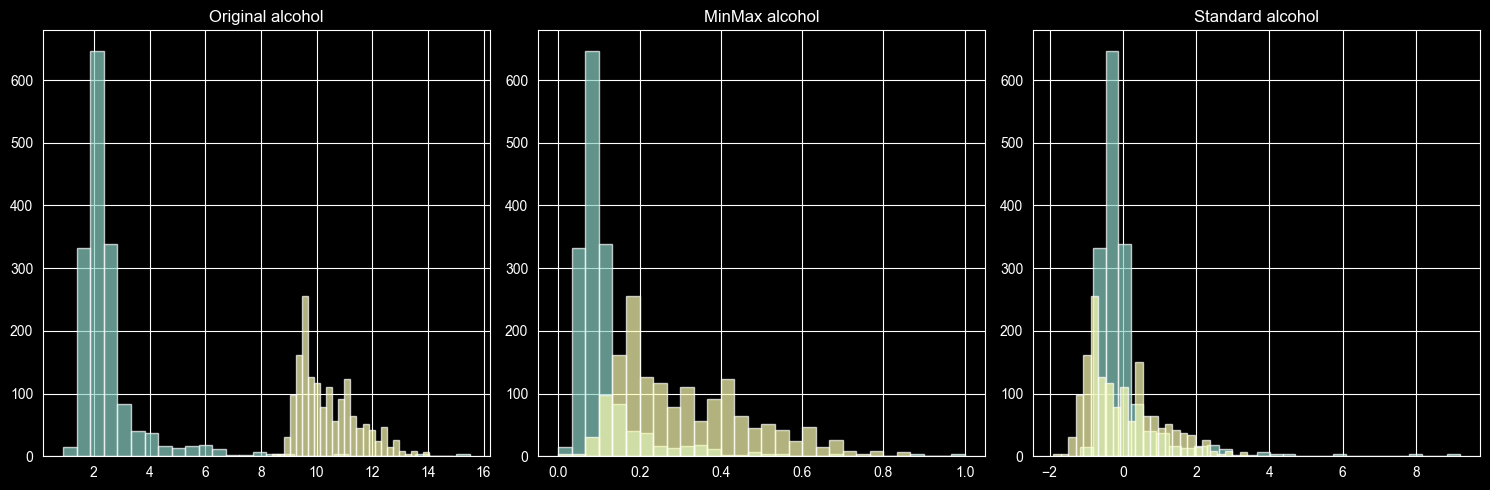

In [13]:
plt.figure(figsize=(15,5))

for i, feature in enumerate(features):
    plt.subplot(1,3,1)
    plt.hist(df[feature], bins=30, alpha=0.7, label='Original')
    plt.title(f'Original {feature}')

    plt.subplot(1,3,2)
    plt.hist(df_minmax[feature], bins=30, alpha=0.7, label='MinMax')
    plt.title(f'MinMax {feature}')

    plt.subplot(1,3,3)
    plt.hist(df_std[feature], bins=30, alpha=0.7, label='Standard')
    plt.title(f'Standard {feature}')

plt.tight_layout()
plt.show()


**When to use each**

**Min–Max:** preserves the shape of the distribution; useful for algorithms with bounded ranges ([0,1]) (NN, kNN).

**Z-score:** standardizes data to zero mean and unit variance; useful for algorithms sensitive to scale (regression, SVM, PCA).


# B2. Feature Creation & Discretization

In [14]:
df["acid_sugar_ratio"] = df["fixed acidity"] / (df["residual sugar"] + 0.1)


### Feature Engineering (Creating new features)

**What we did:**
We created a new feature — the ratio of acidity to sugar.

**Formula:** `acidity / (sugar + 0.1)`

* We added `+0.1` to avoid division by zero.

**Why is this useful?**

Sometimes the **combination** of two features is more important than each one alone.

**In our case:**
The ratio of acid to sugar may affect the taste of wine more than each feature separately.


In [15]:
#Equal-width binning
df["acid_sugar_bin_width"] = pd.cut(df["acid_sugar_ratio"], bins=5)

#Equal-frequency binning
df["acid_sugar_bin_freq"] = pd.qcut(df["acid_sugar_ratio"], q=5)


In [16]:
#Check dist
print(df["acid_sugar_bin_width"].value_counts())
print(df["acid_sugar_bin_freq"].value_counts())


acid_sugar_bin_width
(3.493, 5.04]     680
(1.947, 3.493]    674
(0.392, 1.947]    117
(5.04, 6.587]     111
(6.587, 8.133]     17
Name: count, dtype: int64
acid_sugar_bin_freq
(0.399, 2.769]    325
(4.265, 8.133]    320
(3.296, 3.722]    319
(3.722, 4.265]    319
(2.769, 3.296]    316
Name: count, dtype: int64


In [17]:
# One-hot encoding
df_encoded = pd.get_dummies(df, columns=["acid_sugar_bin_width", "acid_sugar_bin_freq"], drop_first=True)


# 3 Additional Analytical Tasks

# 3.1 D1. Measures of Similarity and Dissimilarity

In [18]:
import numpy as np

# example
vec1 = np.array([1, 2, 3, 4, 5])
vec2 = np.array([2, 4, 6, 8, 10])

# Euc dist
euclidean_dist = np.linalg.norm(vec1 - vec2)
print("Euclidean distance:", euclidean_dist)

# Jaccard similarity
set1 = {1, 2, 3, 4}
set2 = {3, 4, 5, 6}
jaccard_sim = len(set1 & set2) / len(set1 | set2)
print("Jaccard similarity:", jaccard_sim)

# Cosine similarity
cosine_sim = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
print("Cosine similarity:", cosine_sim)

# Pearson correlation coefficient
pearson_corr = np.corrcoef(vec1, vec2)[0, 1]
print("Pearson correlation:", pearson_corr)


Euclidean distance: 7.416198487095663
Jaccard similarity: 0.3333333333333333
Cosine similarity: 1.0
Pearson correlation: 0.9999999999999999


# 3.2 D2. Dimensionality Reduction (PCA)

In [19]:
from sklearn.preprocessing import StandardScaler

X = df.select_dtypes(include="number").drop(columns=["quality"])
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


**What we did:**

1. **Selected features:** all numeric columns except `quality`  11 wine features.
2. **Standardized data:** `(x - mean) / std`  all features now have mean=0 and std=1.

**Why standardize for PCA:**
Without it, features with larger scales (e.g., sulfates) would dominate over smaller ones (e.g., alcohol). Standardization puts all features on equal footing.

**Result:**

* `X_std`: standardized data ready for PCA
* Shape: (1599, 11)


In [20]:
cov_matrix = np.cov(X_std, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
cov_matrix


array([[ 1.00062578, -0.25629118,  0.67212377,  0.11484855,  0.09376383,
        -0.15389043, -0.11325227,  0.66846534, -0.68340559,  0.18312019,
        -0.06170686,  0.45784628],
       [-0.25629118,  1.00062578, -0.55284143,  0.00191908,  0.06133613,
        -0.0105104 ,  0.07651786,  0.02204002,  0.23508431, -0.26115001,
        -0.20241462, -0.2070725 ],
       [ 0.67212377, -0.55284143,  1.00062578,  0.14366701,  0.20395046,
        -0.06101629,  0.03555526,  0.36517555, -0.54224326,  0.31296577,
         0.10997202,  0.27912343],
       [ 0.11484855,  0.00191908,  0.14366701,  1.00062578,  0.05564433,
         0.18716605,  0.20315493,  0.3555057 , -0.08570602,  0.00553058,
         0.04210177, -0.64626509],
       [ 0.09376383,  0.06133613,  0.20395046,  0.05564433,  1.00062578,
         0.00556563,  0.04743013,  0.20075788, -0.26519198,  0.37149281,
        -0.22127893,  0.02930015],
       [-0.15389043, -0.0105104 , -0.06101629,  0.18716605,  0.00556563,
         1.00062578,  



**Covariance matrix:**

An 11×11 table showing how features relate:

* Large positive → both increase together
* Large negative → one rises, the other falls
* Near zero → features are independent




In [21]:
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]



**What we did:**
Sorted eigenvalues and eigenvectors from most to least important.

**Why:**

* PC1 → explains the most variance
* PC2 → explains the second most
* And so on

**Explained variance:**
Think of the data as a high-res image (100% info):

* PC1 might explain 40%
* PC2 adds 20%
* Together → 60% of the info in just 2 numbers instead of 11 🎯





In [22]:
W = eigenvectors[:, :2]
X_pca = X_std @ W

**What we did:**

1. **Took the first 2 eigenvectors:**

2. **Projected the data:**




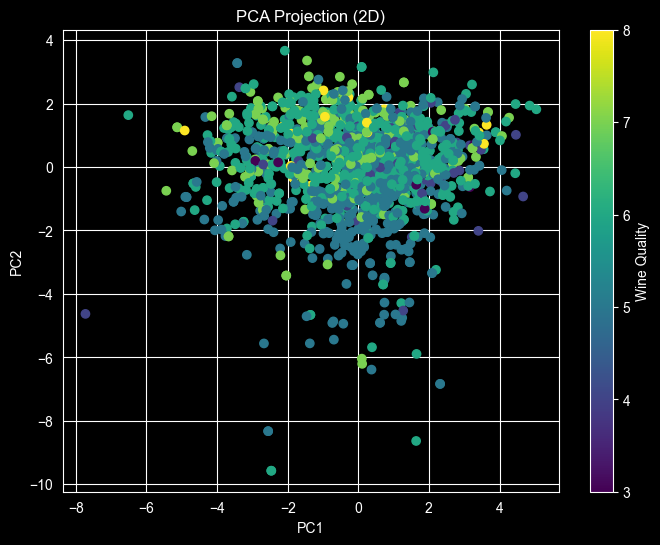

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df["quality"], cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection (2D)")
plt.colorbar(label="Wine Quality")
plt.show()

**On the plot:**

* **X-axis (PC1):** first principal component
* **Y-axis (PC2):** second principal component
* **Each point:** a wine sample
* **Point color:** wine quality (3–8)

  * Dark purple → low quality (3–4)
  * Yellow → high quality (7–8)

**What to look for:**
 **Good signs:**

* Yellow points cluster together, purple points elsewhere → PC1 & PC2 separate wine quality well

**Bad signs:**

* Colors all mixed → 2 PCs not enough → need more components or different methods

**Interpretation of PC1 & PC2:**

* They are **combinations of original features** capturing the main variation.
